# **Importing Dependencies**

In [ ]:
# Basic libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
plt.style.use("ggplot")

# Libraries for text processing and NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")

# Machine Learning libraries for feature extraction, data splitting, and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Deep Learning libraries for model building, tokenization, and padding
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Warnings
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
!pip install wordcloud

# **Importing Dataset & Preprocessing**

In [51]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [53]:
print('Number Of Duplications is :', df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number Of Duplications is : 418


In [54]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [55]:
df["review"][40]

"It had all the clichés of movies of this type and no substance. The plot went nowhere and at the end of the movie I felt like a sucker for watching it. The production was good; however, the script and acting were B-movie quality. The casting was poor because there were good actors mixed in with crumby actors. The good actors didn't hold their own nor did they lift up the others. <br /><br />This movie is not worthy of more words, but I will say more to meet the minimum requirement of ten lines. James Wood and Cuba Gooding, Jr. play caricatures of themselves in other movies. <br /><br />If you are looking for mindless entertainment, I still wouldn't recommend this movie."

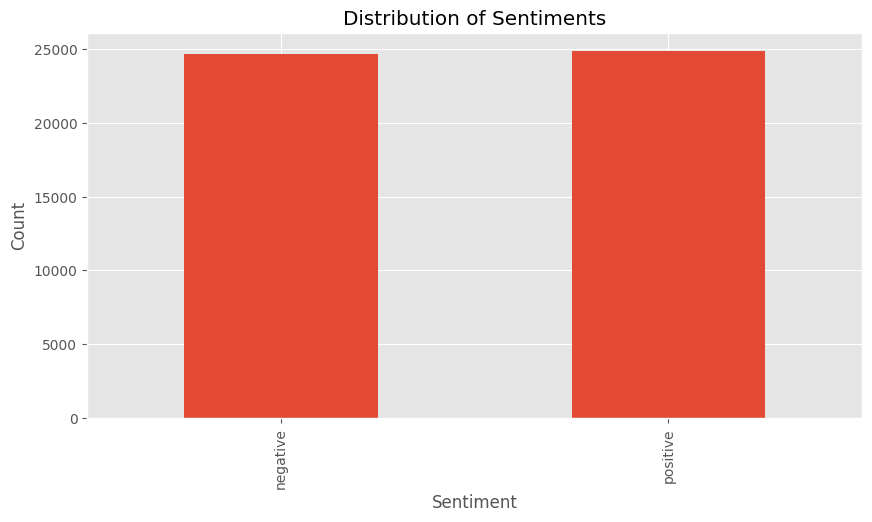

In [ ]:
# Plotting the distribution of sentiments
# Count the occurrences of each sentiment and sort the values
ax = df['sentiment'].value_counts().sort_values().plot(
    kind='bar',  # Create a bar plot
    title='Distribution of Sentiments',  # Set the title of the plot
    figsize=(10, 5)  # Set the size of the figure
)

# Set the x-axis label
ax.set_xlabel("Sentiment")

# Set the y-axis label
ax.set_ylabel("Count") 

# Display the plot
plt.show()


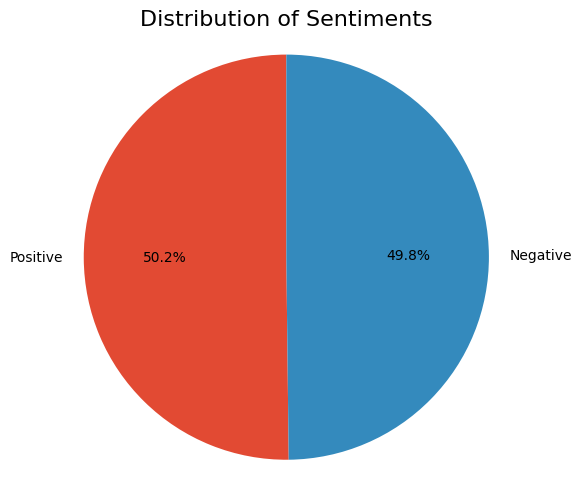

In [115]:
# Calculate sentiment distribution
positive_count = len(df[df['sentiment'] == 1])
negative_count = len(df[df['sentiment'] == 0])
sizes = [positive_count, negative_count]
labels = ['Positive', 'Negative']

# Create a pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plot
plt.tight_layout()
plt.show()


# From the previous output
- the  dataset contains equal number of positive and negative reviews.

# Text Preprocessing and cleaning

- we will define function that takes a text string  and performs preprocessing on the string to remove special characters.

- `The remove_tags(text)` function removes HTML tags from a given string, returning clean text. `The preprocess_text(sen)` function preprocesses a sentence by removing HTML tags, converting it to lowercase, eliminating punctuation and numbers, filtering out single characters, collapsing multiple spaces, and removing  stop words.

In [ ]:
stop_words = set(stopwords.words("english"))

tag_pattern = re.compile(r'<[^>]+>')

def remove_tags(text):
    return tag_pattern.sub('', text)

def preprocess_text(sen):
    # Removing HTML tags
    sentence = remove_tags(sen)
    
    # Convert to lowercase
    sentence = sentence.lower()
    
    # Remove punctuation and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    # Remove single characters
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Remove stop words
    sentence = ' '.join([word for word in sentence.split() if word not in stop_words])

    return sentence


In [ ]:
# Apply the preprocess_text function to each review in the 'review' column to clean and transform the text data
df['review']=df['review'].apply(preprocess_text)


In [60]:
df['review'][40]

'clich movies type substance plot went nowhere end movie felt like sucker watching production good however script acting movie quality casting poor good actors mixed crumby actors good actors hold lift others movie worthy words say meet minimum requirement ten lines james wood cuba gooding jr play caricatures movies looking mindless entertainment still recommend movie'

# convert  labels into integers. convert them into integers by replacing "positive" --> 1 and  negative --> 0 

In [ ]:
# Convert sentiment labels to numerical values
# Replace 'positive' sentiment with 1
df.loc[df['sentiment'] == 'positive', 'sentiment'] = 1

# Replace 'negative' sentiment with 0
df.loc[df['sentiment'] == 'negative', 'sentiment'] = 0


In [ ]:
# Calculate the word length for each review and store it in a new column
# count the number of words in each review
df['word_length'] = df['review'].apply(lambda x: len(x.split()))

df.head()


,review,sentiment,word_length
0,one reviewers mentioned watching oz episode ho...,1,162
1,wonderful little production filming technique ...,1,86
2,thought wonderful way spend time hot summer we...,1,84
3,basically family little boy jake thinks zombie...,0,64
4,petter mattei love time money visually stunnin...,1,125


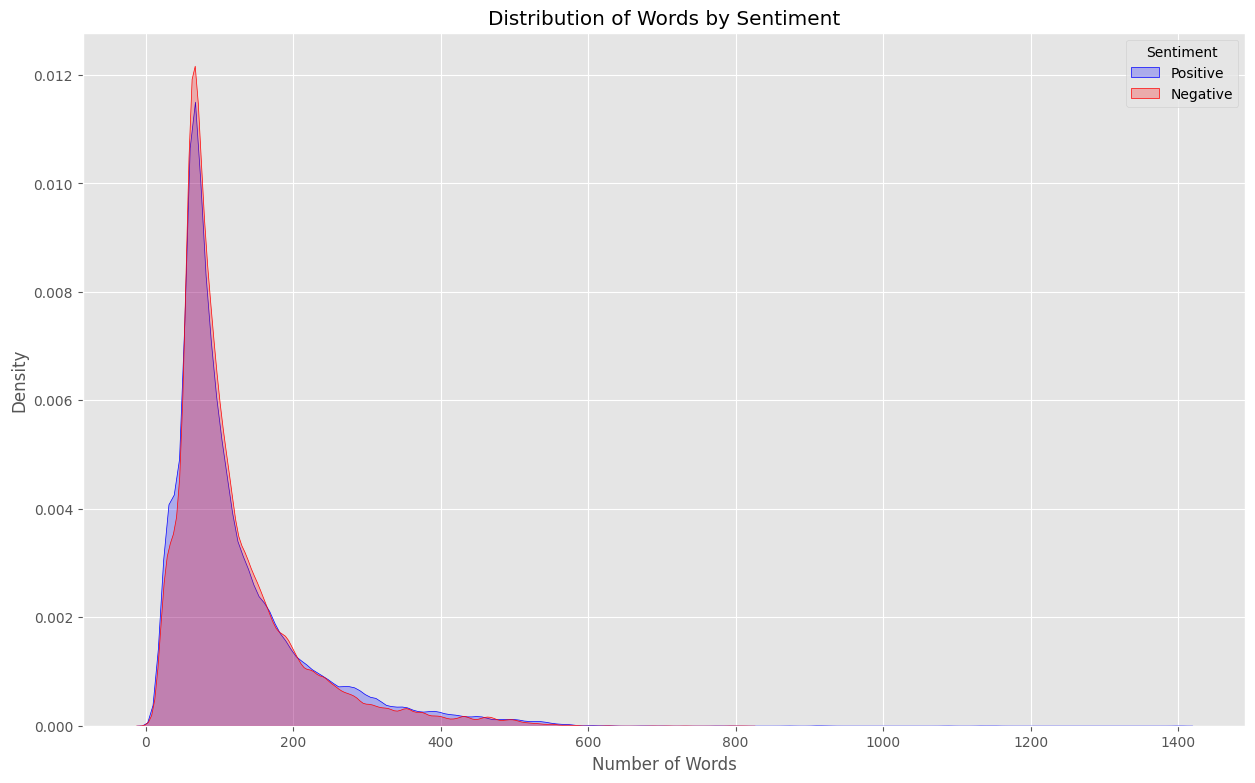

In [ ]:
# Set up the plot size
plt.figure(figsize=(15, 9))

# Plot KDE for Positive sentiment
sns.kdeplot(df[df['sentiment'] == 1]['word_length'], label='Positive', color='blue', fill=True, bw_adjust=0.5)

# Plot KDE for Negative sentiment
sns.kdeplot(df[df['sentiment'] == 0]['word_length'], label='Negative', color='red', fill=True, bw_adjust=0.5)


plt.title("Distribution of Words by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()


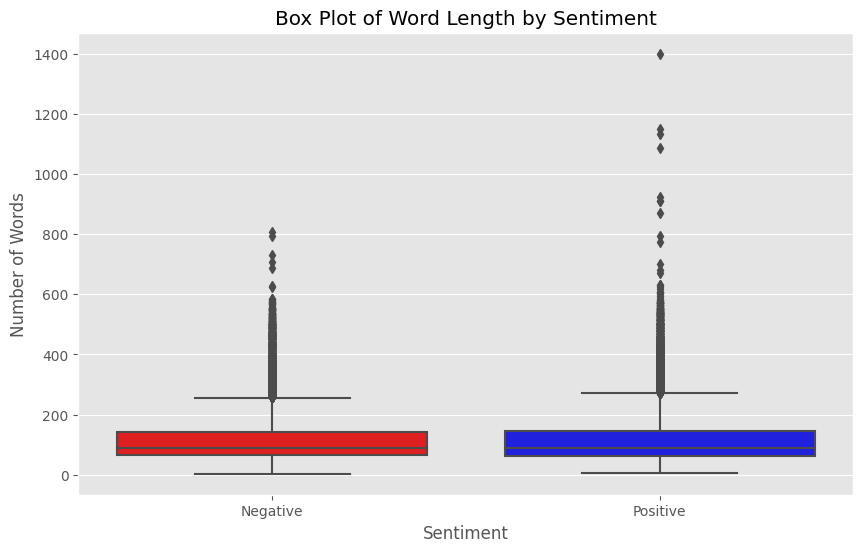

In [ ]:
# Set up the plot size
plt.figure(figsize=(10, 6))
# Create a box plot for word length distribution by sentiment
sns.boxplot(x='sentiment', y='word_length', data=df, palette=['red', 'blue'])
# Update plot aesthetics
plt.title("Box Plot of Word Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Words")
plt.xticks([0, 1], ['Negative', 'Positive'])  # Label x-axis for sentiment categories
plt.show()


In [65]:
average_length = df.groupby('sentiment')['word_length'].mean()
print("Average review length:")
print(average_length)

Average review length:
sentiment
0    116.133128
1    119.834392
Name: word_length, dtype: float64


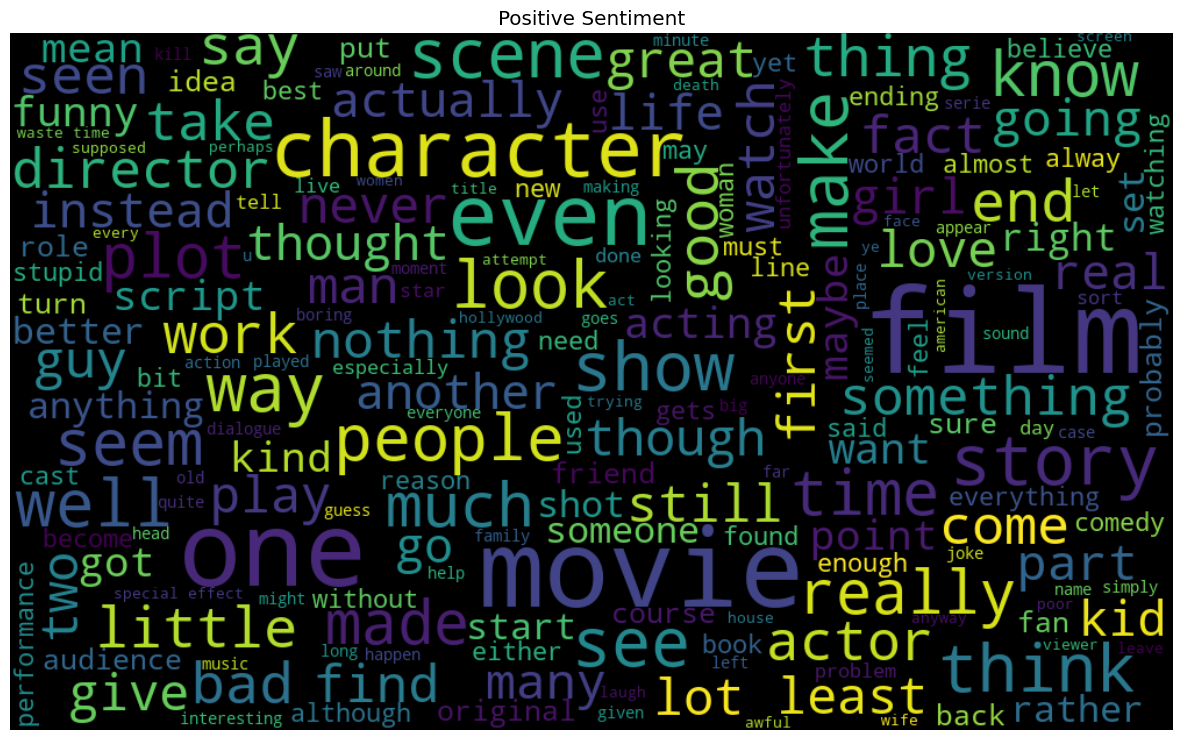

In [ ]:
# Combine all reviews for the specified sentiment
reviews = ' '.join(word for word in df['review'][df['sentiment'] == 0].astype(str))

# Create the word cloud
wordcloud = WordCloud(height=600, width=1000, max_font_size=100, background_color='black').generate(reviews)

# Display the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels

# Set The Title 
plt.title(  "Positive Sentiment")
plt.show()


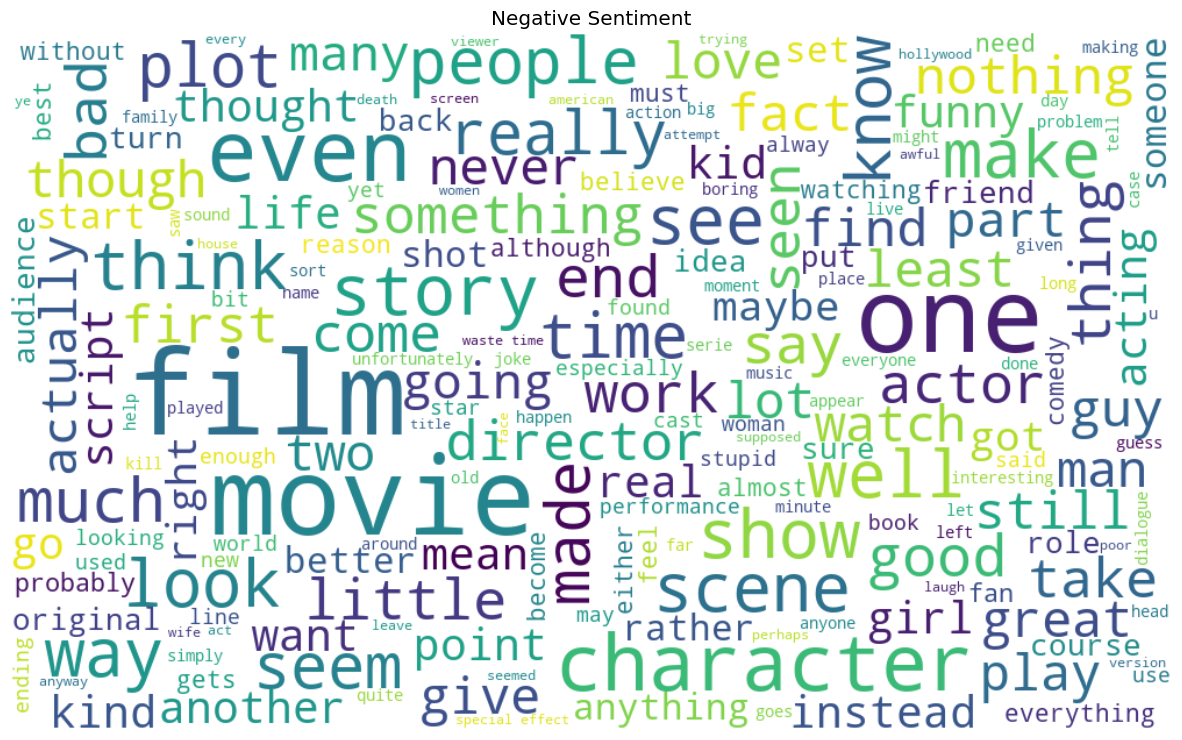

In [ ]:
# Combine all reviews labeled with sentiment 0 ( negative sentiment)
reviews = ' '.join(word for word in df['review'][df['sentiment'] == 0].astype(str))

# Generate the word cloud
wordcloud = WordCloud(height=600, width=1000, max_font_size=100, background_color='white').generate(reviews)

# Display the word cloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis labels
plt.title("Negative Sentiment")
plt.show()


# Split dataset into train and test sets. The train set will be used to train models while the test set will be used in evaluation.

In [ ]:
# Split the data
X=df['review']
y=df['sentiment']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
tfidf.fit(X)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


set the maximum size of each list to 100. The lists with size greater than 100 will be truncated to 100. For the lists that have length less than 100, we will add 0 at the end of the list until it reaches the max length --> padding.

In [ ]:

#Tokenizer create a word-to-index dictionary. In the word-to-index dictionary, each word is used as a key, while a corresponding unique index is used as the value for the key. 
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
word_index=tokenizer.word_index

# Create sequences for training and testing data
X_train_seq=tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)

max_len = 28   # Maximum sequence length

# Pad sequences to ensure uniform length
X_train_pad=pad_sequences(X_train_seq,maxlen=max_len,padding='post')
X_test_pad=pad_sequences(X_test_seq,maxlen=max_len,padding='post')

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Load GloVe embeddings
embeddings_dictionary = {}
# Read the GloVe file and load embeddings into a dictionary
with open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8") as glove_file:
    for line in glove_file:
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions


In [72]:
# Create embedding matrix
embedding_dim = 100  # Using 100-dimensional GloVe embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [73]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

# **Machine Learning Models**

In [ ]:
# #  grid for GridSearchCV
# grid_param = {
#     'LogisticRegression': {"C": [0.1, 1, 10]},
#     'RandomForestClassifier': {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, 12]},
#     'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1]},
#     'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
#     'XGBClassifier': {'n_estimators': [ 100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]}
# }
#
# models = {
#     'LogisticRegression': LogisticRegression(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'AdaBoostClassifier': AdaBoostClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
#     'XGBClassifier': XGBClassifier()
# }
# # evaluation function
# def evaluate_model(actual, pred):
#     report = classification_report(actual, pred)
#     cm = confusion_matrix(actual, pred)
#     accuracy = accuracy_score(actual, pred)
#     return report, cm, accuracy

# test_scores = []
# for name, model in models.items():
#     print(f"Evaluating model: {name}\n")

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(model, grid_param[name], cv=3, scoring='f1')
#     grid_search.fit(X_train_tfidf, y_train)

#     # Get the best model from grid search
#     best_model = grid_search.best_estimator_

#     # Make predictions on training and testing data
#     train_pred = best_model.predict(X_train_tfidf)
#     test_pred = best_model.predict(X_test_tfidf)

#     # Evaluate the model on training data
#     _,_, train_accuracy = evaluate_model(y_train, train_pred)

#     # Evaluate the model on testing data
#     test_report, test_cm, test_accuracy = evaluate_model(y_test, test_pred)
#     #Print the results
#     print(f"Train Accuracy = {train_accuracy}")
#     print('Model Testing Performance\n')
#     print(f"Test Accuracy = {test_accuracy}")
#     print(f'Test Report = \n{test_report}')
#     print(f'Test Confusion Matrix = \n{test_cm}')
#     print(f'\nBest Parameters: {grid_search.best_params_}\n')
#     print('----' * 20)
#     print('\n')

#     # Store the test accuracy
#     test_scores.append(test_accuracy)



In [74]:
# Define models
models = {
    'LogisticRegression': LogisticRegression(C=10),  # Default C value
    'RandomForestClassifier': RandomForestClassifier(n_estimators=200, max_depth=12),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    'XGBClassifier': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

# Function to evaluate the model's performance
def evaluate_model(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return report, cm, accuracy

In [75]:
# Initialize test_scores list to store test accuracy for each model
test_scores = []

# Train and evaluate each model independently
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}\n")

    # Fit the model on training data
    model.fit(X_train_tfidf, y_train)

    # Make predictions on training and testing data
    train_pred = model.predict(X_train_tfidf)
    test_pred = model.predict(X_test_tfidf)

    # Evaluate the model on training data
    train_report, train_cm, train_accuracy = evaluate_model(y_train, train_pred)

    # Evaluate the model on testing data
    test_report, test_cm, test_accuracy = evaluate_model(y_test, test_pred)

    # Print the results
    print('Model Training Performance\n')
    print(f"Train Accuracy = {train_accuracy}")
    print(f"Train Report = \n{train_report}")
    print(f"Train Confusion Matrix = \n{train_cm}")

    print('\nModel Testing Performance\n')
    print(f"Test Accuracy = {test_accuracy}")
    print(f"Test Report = \n{test_report}")
    print(f"Test Confusion Matrix = \n{test_cm}")
    print('----' * 20)
    print('\n')

    # Store the test accuracy
    test_scores.append((model_name, test_accuracy))


Evaluating model: LogisticRegression

Model Training Performance

Train Accuracy = 0.9862599268876844
Train Report = 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19759
           1       0.99      0.99      0.99     19906

    accuracy                           0.99     39665
   macro avg       0.99      0.99      0.99     39665
weighted avg       0.99      0.99      0.99     39665

Train Confusion Matrix = 
[[19468   291]
 [  254 19652]]

Model Testing Performance

Test Accuracy = 0.8968438035696279
Test Report = 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4939
           1       0.89      0.91      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917

Test Confusion Matrix = 
[[4374  565]
 [ 458 4520]]
-----------------------------------------

In [103]:

# Convert the test_scores list to a DataFrame
test_scores_df = pd.DataFrame(test_scores, columns=['Model', 'Test Scores'])
test_scores_df

,Model,Test Scores
0,LogisticRegression,0.896844
1,RandomForestClassifier,0.833619
2,AdaBoostClassifier,0.754361
3,GradientBoostingClassifier,0.797419
4,XGBClassifier,0.794293


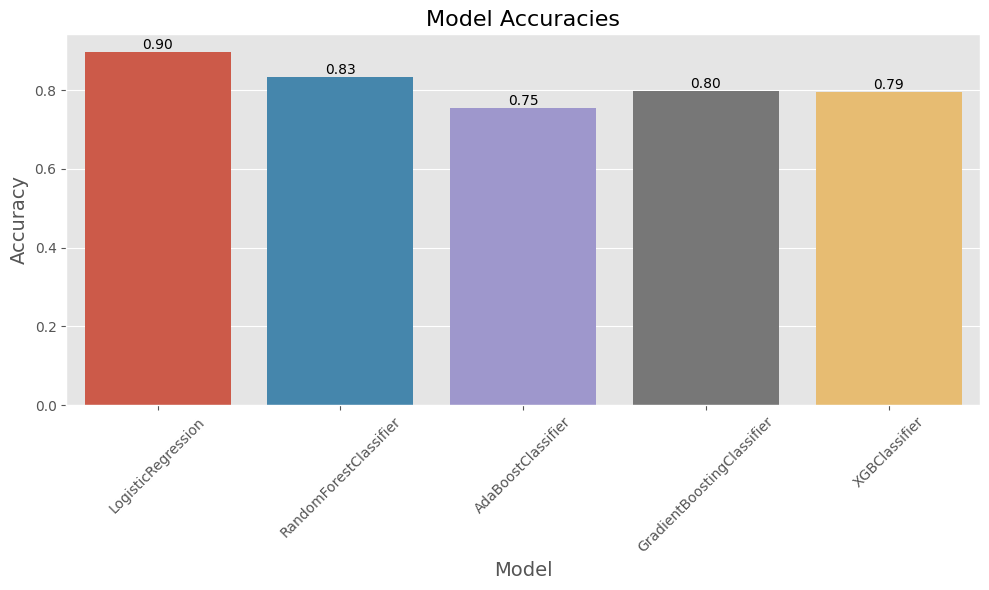

In [111]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=test_scores_df, x='Model', y='Test Scores')

# Add title and labels
plt.title('Model Accuracies', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Add data labels on top of the bars
for index, row in test_scores_df.iterrows():
    plt.text(index, row['Test Scores'], f'{row["Test Scores"]:.2f}', 
             color='black', ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# LSTM With Glove Embedding

In [77]:
# Training configuration
epochs = 10
batch_size = 128

In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

# Evaluate the model
lstm_score = lstm_model.evaluate(X_test_pad, y_test, verbose=1)

print("Test Score:", lstm_score[0])
print("Test Accuracy:", lstm_score[1])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    10,124,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,124,600 (38.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,124,600 (38.62 MB)

Epoch 1/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6477 - loss: 0.6195 - val_accuracy: 0.7989 - val_loss: 0.4523
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8103 - loss: 0.4308 - val_accuracy: 0.8352 - val_loss: 0.3788
Epoch 3/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8406 - loss: 0.3739 - val_accuracy: 0.8424 - val_loss: 0.3657
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8571 - loss: 0.3364 - val_accuracy: 0.8518 - val_loss: 0.3415
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8666 - loss: 0.3158 - val_accuracy: 0.8519 - val_loss: 0.3440
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8697 - loss: 0.3053 - val_accuracy: 0.8582 - val_loss: 0.3294
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8802 - loss: 0.2870 - val_accuracy: 0.8587 - val_loss: 0.3436
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8861 - loss: 0.2764 - val_accuracy: 0

In [79]:
def plot_graphs(history, string):
    plt.plot(history.history[string])  # Plot training metrics
    plt.plot(history.history['val_' + string])  # Plot validation metrics
    plt.xlabel('Epochs')  # Label for the x-axis
    plt.ylabel(string)  # Label for the y-axis
    plt.legend([string, 'val_' + string])  # Create a legend to distinguish training and validation
    plt.show()  # Display the plot

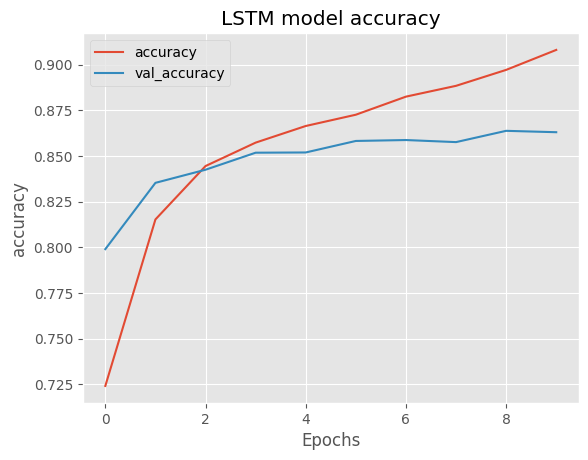

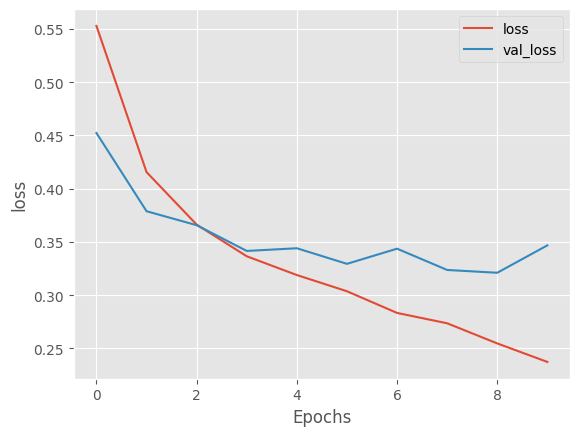

In [80]:
plt.title('LSTM model accuracy')
# Plot training and validation accuracy
plot_graphs(history, 'accuracy')
# Plot training and validation loss
plot_graphs(history, 'loss')

# Bidirectional LSTM 

In [ ]:
# Initialize the model
blstm_model = Sequential()

# Embedding layer: converts each word into a dense vector representation
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                            weights=[embedding_matrix], input_length=max_len, trainable=False)
blstm_model.add(embedding_layer)

# First bidirectional LSTM layer , dropout for regularization
blstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
blstm_model.add(Dropout(0.5))

# Second bidirectional LSTM.
blstm_model.add(Bidirectional(LSTM(64)))
blstm_model.add(Dropout(0.5))

# Fully connected layer with ReLU activation and batch normalization
blstm_model.add(Dense(64, activation='relu'))
blstm_model.add(BatchNormalization())

# Output layer with sigmoid activation for binary classification
blstm_model.add(Dense(1, activation='sigmoid'))

# Model summary 
blstm_model.summary()

# Compile the model with binary cross-entropy loss and Adam optimizer
blstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = blstm_model.fit(X_train_pad, y_train, batch_size=512, epochs=10, verbose=1,validation_split=0.2)

# Evaluate the model
blstm_score = blstm_model.evaluate(X_test_pad, y_test, verbose=1)

print("Test Score:",blstm_score[0])
print("Test Accuracy:", blstm_score[1])


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │    10,124,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,124,600 (38.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,124,600 (38.62 MB)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.6432 - loss: 0.6578 - val_accuracy: 0.7715 - val_loss: 0.5516
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.8018 - loss: 0.4362 - val_accuracy: 0.8093 - val_loss: 0.4759
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8220 - loss: 0.3972 - val_accuracy: 0.8296 - val_loss: 0.3880
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8396 - loss: 0.3655 - val_accuracy: 0.8221 - val_loss: 0.3958
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8555 - loss: 0.3356 - val_accuracy: 0.8433 - val_loss: 0.3565
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8608 - loss: 0.3193 - val_accuracy: 0.8553 - val_loss: 0.3325
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8692 - loss: 0.3023 - val_accuracy: 0.8545 - val_loss: 0.3409
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8789 - loss: 0.2852 - val_accuracy: 0.8370 - 

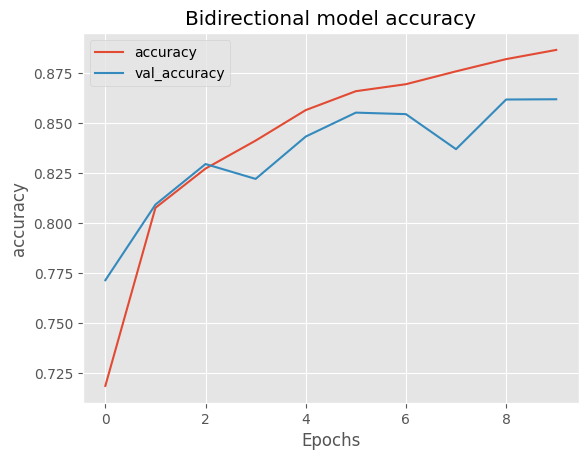

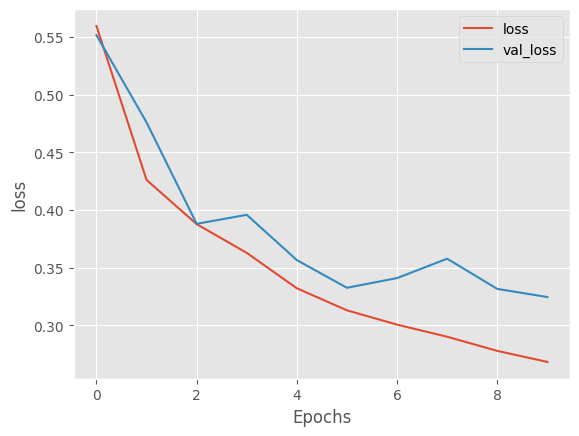

In [98]:
plt.title('Bidirectional model accuracy')
# Plot training and validation accuracy
plot_graphs(history, 'accuracy')

# Plot training and validation loss
plot_graphs(history, 'loss')


# Bidirectional GRU 

In [ ]:
# Initialize the model
gru_model = Sequential()

# Embedding layer: converts each word into a dense vector representation
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                            weights=[embedding_matrix], input_length=max_len, trainable=True)
gru_model.add(embedding_layer)

# First bidirectional GRU layer , dropout for regularization
gru_model.add(Bidirectional(GRU(128, return_sequences=True)))
gru_model.add(Dropout(0.5))

# Second bidirectional GRU layer
gru_model.add(Bidirectional(GRU(64)))
gru_model.add(Dropout(0.5))

# Fully connected layer with ReLU activation and batch normalization
gru_model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
gru_model.add(BatchNormalization())

# Output layer with sigmoid activation for binary classification
gru_model.add(Dense(1, activation='sigmoid'))

# Model summary
gru_model.summary()

# Compile the model with binary cross-entropy loss and Adam optimizer
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history =gru_model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=6, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
gru_score = gru_model.evaluate(X_test_pad, y_test, verbose=1)

print("Test Score:", gru_score[0])
print("Test Accuracy:", gru_score[1])


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │    10,124,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,124,600 (38.62 MB)

 Trainable params: 10,124,600 (38.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6249 - loss: 1.2641 - val_accuracy: 0.8332 - val_loss: 0.5634
Epoch 2/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8747 - loss: 0.4552 - val_accuracy: 0.8717 - val_loss: 0.3643
Epoch 3/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9021 - loss: 0.2887 - val_accuracy: 0.8762 - val_loss: 0.3299
Epoch 4/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9135 - loss: 0.2307 - val_accuracy: 0.8801 - val_loss: 0.3049
Epoch 5/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9294 - loss: 0.1922 - val_accuracy: 0.8748 - val_loss: 0.3199
Epoch 6/6
248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9427 - loss: 0.1592 - val_accuracy: 0.8717 - val_loss: 0.4321
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8800 - loss: 0.3210
Test Score: 0.31483906507492065
Test Accuracy: 0.8788948059082031


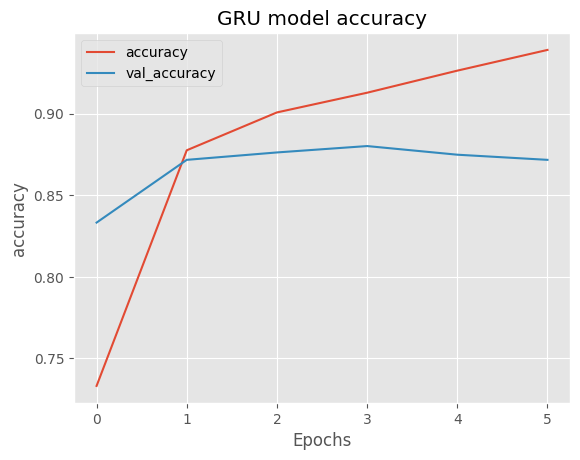

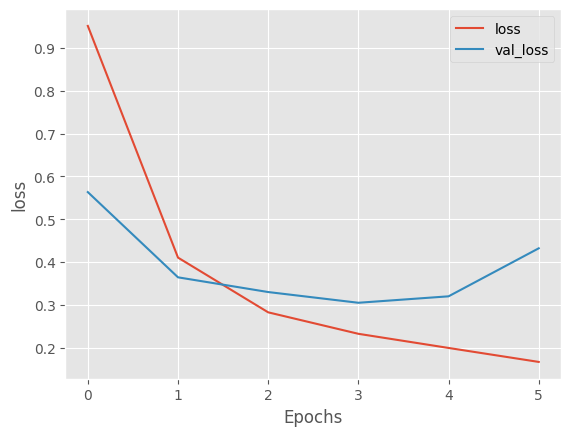

In [96]:
plt.title('GRU model accuracy')
# Plot training and validation accuracy
plot_graphs(history, 'accuracy')

# Plot training and validation loss
plot_graphs(history, 'loss')


# **Make Predictions**

In [112]:
instance =df['review'][70]
print(instance)

caddyshack two good movie compared original cant stack robert stack horrible replacement ted knight jackie mason funny cant compete rodney dangerfield ty webb funny character original characters movie lack punch original henry wilcoxon example except hystericly funny lawyer peter blunt played randy quaid every line says reminds originals humor especially scene office go law suits motions find live come house beat door f ing baseball bat make bonfire chippindale maybe roast golden retriever arff arff arff eat comin upstairs junior grabbing brooks brothers pjs cramming brand new bmw tight understanding offsetting small role however dan acroyd obviously replacement bill murray voice beyond irritating everything isnt even funny stupid overall caddyshack ii good movie comparison awesome original cant cut


In [ ]:
# Convert the input text instance to a sequence of integers using the tokenizer
instance = tokenizer.texts_to_sequences(instance)

# Flatten the list of sequences into a single list
flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

# Wrap the flat list in another list to create a 2D array (required for padding)
flat_list = [flat_list]

# Pad the sequences to ensure uniform input size for the model
instance = pad_sequences(flat_list, padding='post', maxlen=max_len)

# Use the model to predict the sentiment of the processed instance
model.predict(instance)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


array([[0.90760624]], dtype=float32)